In [44]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True)

In [45]:
DSN = 'scada-lgw.c1odobldq4uq.us-west-2.rds.amazonaws.com'
username = 'admin'
password = 'OpsR3porting!'

conn = pyodbc.connect('DRIVER=SQL Server;SERVER=%s;UID=%s;PWD=%s' %(DSN, username, password))

In [46]:
# power curve query
# pulling data takes too long. Need to investigate
siteid = 'CASJOSQL01' 
turbineid = '2304193'
startdate = '2018-01-1'
enddate = '2018-01-16'

query = """ SELECT 
                tblSCTurbine.[TimeStamp], 
                tblSCTurbine.StationId,
                tblSCTurGrid.wtc_ActPower_mean AS ActivePower, 
                tblSCTurbine.wtc_AcWindSp_mean AS WindSpeed
            FROM [wpsHistory_%s].[dbo].tblSCTurbine 
            INNER JOIN [wpsHistory_%s].[dbo].tblSCTurGrid
                ON tblSCTurbine.[TimeStamp] = tblSCTurGrid.[TimeStamp] 
                AND tblSCTurbine.StationId = tblSCTurGrid.StationId
            WHERE tblSCTurbine.StationId IN (%s)
            AND tblSCTurbine.[TimeStamp] BETWEEN '%s' AND '%s'
        """ %(siteid, siteid, turbineid, startdate, enddate)

df_powercurve = pd.read_sql(query, conn)

In [96]:
df_powercurve.head()

,TimeStamp,StationId,ActivePower,WindSpeed,Date
0,2018-01-01 00:00:00,2304193,2294.623535,10.907425,2018-01-01
1,2018-01-01 00:00:00,2304194,2292.858643,10.687522,2018-01-01
2,2018-01-01 00:10:00,2304194,2293.483154,10.390785,2018-01-01
3,2018-01-01 00:20:00,2304194,2275.664062,10.227650,2018-01-01
4,2018-01-01 00:30:00,2304194,2272.006592,9.947680,2018-01-01


In [95]:
df_powercurve['Date'] = df_powercurve['TimeStamp'].dt.date

In [97]:
df_powercurve.describe()

,StationId,ActivePower,WindSpeed
count,4.322000e+03,4322.000000,4322.000000
mean,2.304194e+06,1447.497429,9.273469
std,5.000579e-01,950.216171,4.253835
min,2.304193e+06,-26.274050,0.570437
25%,2.304193e+06,377.339691,5.747036
50%,2.304194e+06,1846.328186,9.579129
75%,2.304194e+06,2300.204285,12.342421
max,2.304194e+06,2423.765137,20.520927


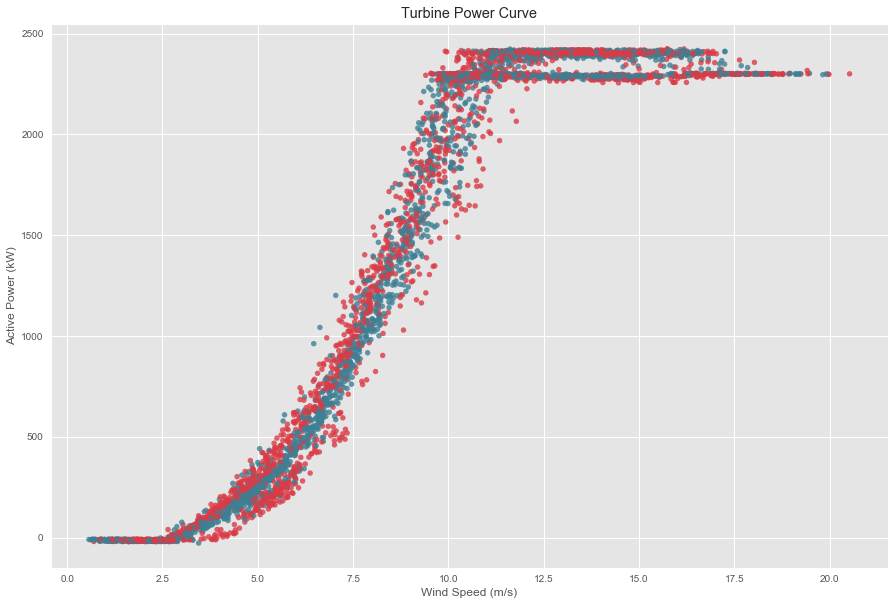

In [99]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.style.use('ggplot')

plt.scatter(x = df_powercurve.WindSpeed, 
            y = df_powercurve.ActivePower, 
            c = df_powercurve.StationId, 
            cmap=cmap,
            alpha=0.8,
            s = 30,
            edgecolors='none',
            label = df_powercurve.StationId
           )

plt.plot(x = df_powercurve.WindSpeed, 
         y = df_powercurve.ActivePower
        )

plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Active Power (kW)")
plt.title('Turbine Power Curve')
#plt.legend(loc=2)

plt.show()

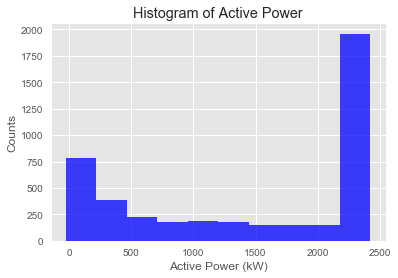

In [62]:
plt.hist(df_powercurve.ActivePower,facecolor='b', alpha=0.75)

plt.xlabel('Active Power (kW)')
plt.ylabel('Counts')
plt.title('Histogram of Active Power')
plt.show()

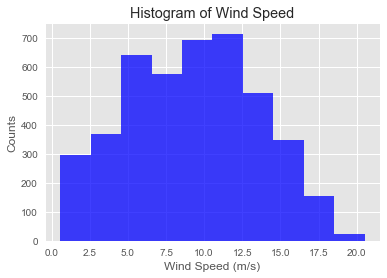

In [63]:
plt.hist(df_powercurve.WindSpeed,facecolor='b', alpha=0.75)

plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Counts')
plt.title('Histogram of Wind Speed')
plt.show()

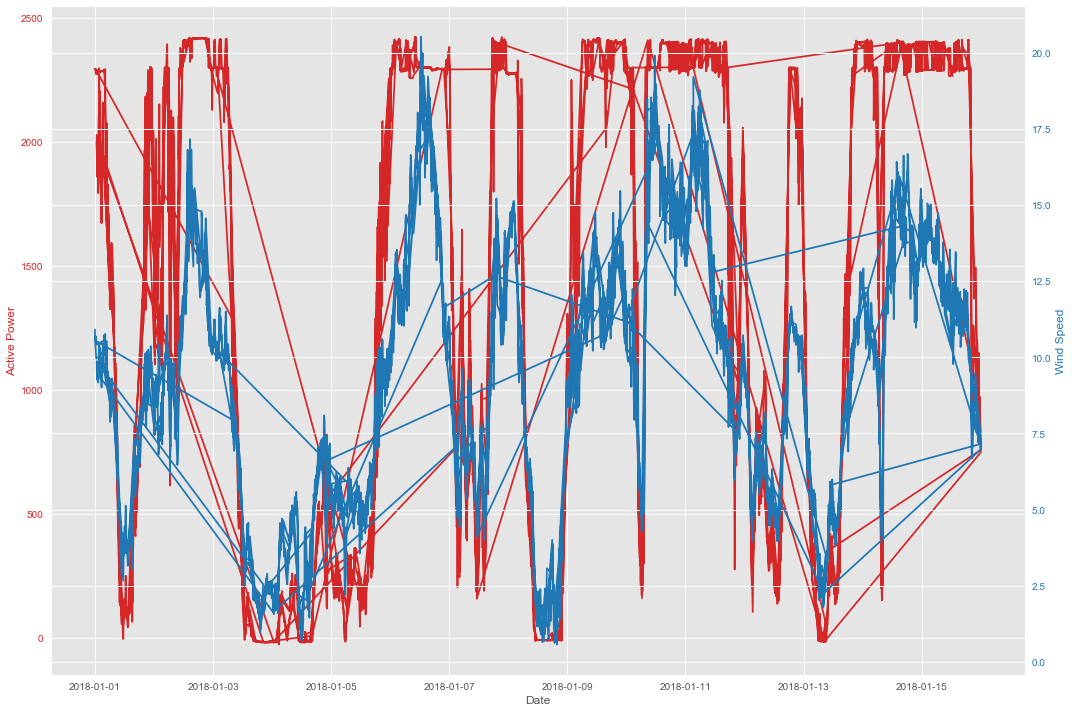

In [119]:
fig, ax1 = plt.subplots(figsize=(15, 10))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Active Power', color=color)
ax1.plot(df_powercurve.TimeStamp, df_powercurve.ActivePower, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Wind Speed', color=color)  # we already handled the x-label with ax1
ax2.plot(df_powercurve.TimeStamp, df_powercurve.WindSpeed, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

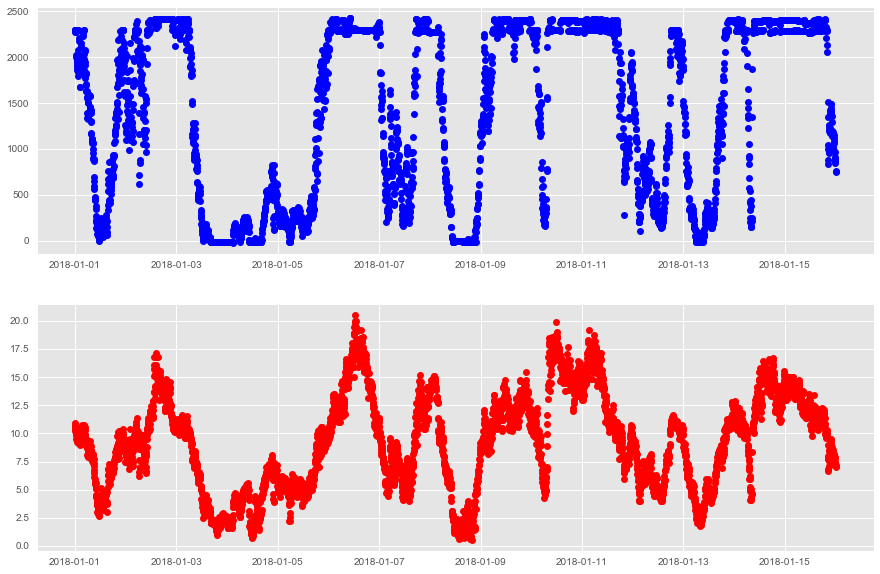

In [117]:
fig, ax1 = plt.subplots(figsize=(15, 10))


plt.figure(1)
plt.subplot(211)
plt.plot(df_powercurve.TimeStamp, df_powercurve.ActivePower, 'bo')

plt.subplot(212)
plt.plot(df_powercurve.TimeStamp, df_powercurve.WindSpeed, 'ro')
plt.show()